In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('car.csv')

In [4]:
df.head(3)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y


In [5]:
df.drop('Sales_ID',axis = 1,inplace=True)

In [12]:
df1=df.copy()

In [13]:
df1.head(3)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y


In [15]:
def space_impute(cols):
    x = cols
    return x.strip()

In [16]:
df1['torque'] = df1['torque'].apply(space_impute)

In [17]:
df1['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
7901             113.7Nm@ 4000rpm
7902    24@ 1,900-2,750(kgm@ rpm)
7903               190Nm@ 2000rpm
7904          140Nm@ 1800-3000rpm
7905          140Nm@ 1800-3000rpm
Name: torque, Length: 7906, dtype: object

In [20]:
def kgm(cols):
    x = cols
    return 'kgm' in x

In [21]:
df1['torque_kgm'] = df1['torque'].apply(kgm)

In [54]:
df_kgm = df1[df1['torque_kgm'] == True]

In [27]:
df_kgm_f =  df1[df1['torque_kgm'] == False]

In [55]:
df_kgm['torque'] = df_kgm['torque'].str.split(expand = True)[0]

In [35]:
df_kgm.head(3)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,torque_kgm
2,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,12.7@,5,Y,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4,5,Y,True
4,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,11.5@,5,Y,True


In [38]:
df_kgm['torque'].head(50)

2                12.7@
3                 22.4
4                11.5@
6                 7.8@
16                22.4
30             6.1kgm@
85             6.1kgm@
178           13.1kgm@
218               11.4
233              12.5@
241              11.8@
242               11.4
260              20.4@
270              12.5@
291               11.4
312              11.5@
315               11.4
318              20.4@
346              20.4@
380              20.4@
382              14.9@
383                24@
387              13.5@
421              20.4@
464              14.3@
500               8.5@
551               22.4
568              20.4@
585               115@
619               22.4
625               9.8@
652                24@
701              12.5@
722                13@
728              20.4@
744               22.4
751    380Nm(38.7kgm)@
778              12.7@
791            6.1kgm@
797               11.4
804               9.8@
813              25.5@
818              16.3@
825        

In [ ]:
import re
just = 'Standard Price:20000'
price = re.findall("\d+", just)[0]

In [82]:
def reg_kgm(cols):
    x=cols
    return re.findall("\d+",x)[0]

In [45]:
df_kgm['torque1'] = df_kgm['torque'].apply(reg_kgm)

In [56]:
df_kgm['torque2'] = df_kgm['torque'].apply(kgm)

In [62]:
df_kgm_True = df_kgm[df_kgm['torque2'] == True]

In [64]:
df_kgm_True.drop(751,inplace = True)

In [66]:
df_kgm_True.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,torque_kgm,torque2
30,Maruti Omni 8 Seater BSIV,2012,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@,5,Y,True,True
85,Maruti Omni 8 Seater BSIV,2017,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@,5,Y,True,True
178,Honda City 1.5 EXI,2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,13.0 kmpl,1493 CC,100 bhp,13.1kgm@,5,Y,True,True
791,Maruti Omni 8 Seater BSII,2009,101000,90000,West,Washington,Seattle,Petrol,Individual,Manual,Fourth & Above Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@,8,Y,True,True
1227,Honda City 1.5 EXI,2002,81000,161000,West,Oregon,Troutdale,Petrol,Individual,Manual,Fourth & Above Owner,13.0 kmpl,1493 CC,100 bhp,13.1kgm@,5,Y,True,True


In [67]:
df_kgm_True['torque_final'] = df_kgm_True['torque'].apply(reg_kgm)

In [70]:
df_kgm_True.drop(['torque_kgm','torque2','torque'],axis = 1,inplace =True)

In [77]:
df_kgm_True.shape

(28, 17)

In [72]:
df_kgm_false = df_kgm[df_kgm['torque2'] == False]

In [83]:
df_kgm_false['torque_final'] = df_kgm_false['torque'].apply(reg_kgm)

In [85]:
df_kgm_false.drop(['torque','torque_kgm','torque2'],axis = 1,inplace = True)

In [86]:
df_kgm_false.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,torque_final
2,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y,12
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Y,22
4,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Y,11
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5,Y,7
16,Hyundai i20 1.4 CRDi Asta,2012,500000,53000,Central,Texas,Dallas,Diesel,Individual,Manual,Second Owner,23.0 kmpl,1396 CC,90 bhp,5,Y,22


In [89]:
df_kgm = pd.concat([df_kgm_True,df_kgm_false])

In [101]:
df_kgm['torque_final'].astype(int)

30       6
85       6
178     13
791      6
1227    13
        ..
7858    13
7861    16
7882    13
7891    20
7902    24
Name: torque_final, Length: 491, dtype: int32

In [106]:
def string(cols):
    x = cols
    return int(x)

In [107]:
df_kgm['torque_final'] = df_kgm['torque_final'].apply(string)

In [111]:
df_kgm_f

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,torque_kgm
0,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y,False
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5,Y,False
7,Maruti 800 DX BSII,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4,Y,False
8,Toyota Etios VXD,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5,Y,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Central,Texas,Plano,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5,N,False
7901,Hyundai i20 Magna,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5,N,False
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5,N,False
7904,Tata Indigo CR4,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5,N,False


In [114]:
df_kgm_f['torque_final'] = df_kgm_f['torque'].apply(reg_kgm)

In [115]:
df_kgm_f['torque_final']

0    190
1    250
5    113
7     59
8    170
Name: torque_final, dtype: object

In [116]:
df_kgm_f['torque_final'] = df_kgm_f['torque_final'].apply(string)

In [118]:
df_kgm_f.shape

(7414, 19)

In [122]:
def tor_con(cols):
    x = cols
    return x * 9.80665

In [125]:
df_kgm['torque_final'] = df_kgm['torque_final'].apply(tor_con)

In [127]:
df_kgm.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,torque_final
30,Maruti Omni 8 Seater BSIV,2012,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
85,Maruti Omni 8 Seater BSIV,2017,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
178,Honda City 1.5 EXI,2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,13.0 kmpl,1493 CC,100 bhp,5,Y,127.48645
791,Maruti Omni 8 Seater BSII,2009,101000,90000,West,Washington,Seattle,Petrol,Individual,Manual,Fourth & Above Owner,19.7 kmpl,796 CC,35 bhp,8,Y,58.83990
1227,Honda City 1.5 EXI,2002,81000,161000,West,Oregon,Troutdale,Petrol,Individual,Manual,Fourth & Above Owner,13.0 kmpl,1493 CC,100 bhp,5,Y,127.48645


In [128]:
df_kgm_f.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,torque_kgm,torque_final
0,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y,False,190
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y,False,250
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5,Y,False,113
7,Maruti 800 DX BSII,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4,Y,False,59
8,Toyota Etios VXD,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5,Y,False,170


In [135]:
df_kgm_f.drop(['torque','torque_kgm'],axis = 1,inplace = True)

In [137]:
df_kgm_f.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,torque_final
0,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y,190
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y,250
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5,Y,113
7,Maruti 800 DX BSII,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4,Y,59
8,Toyota Etios VXD,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5,Y,170


In [187]:
df1 = pd.concat([df_kgm,df_kgm_f])

In [192]:
df1.reset_index(inplace = True)

In [193]:
df1.drop('index',axis = 1,inplace =True)

In [194]:
df1.head(3)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,torque_final
0,Maruti Omni 8 Seater BSIV,2012,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
1,Maruti Omni 8 Seater BSIV,2017,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
2,Honda City 1.5 EXI,2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,13.0 kmpl,1493 CC,100 bhp,5,Y,127.48645


In [155]:
df1.head(3)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,seats,torque_final,Power,Mileage,Engine
0,Maruti Omni 8 Seater BSIV,2012,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,5,58.83990,35.0,14.0,796
1,Maruti Omni 8 Seater BSIV,2017,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,5,58.83990,35.0,14.0,796
2,Honda City 1.5 EXI,2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,5,127.48645,35.0,14.0,796


In [230]:
for i in range(df1.shape[0]):
    if df1['year'][i] in (1994,1995,1996,1997,1998,1999):
        df1['year'][i] = '19th Century'
    elif df1['year'][i] in (2000,2001,2002,2003,2004,2005):
        df1['year'][i] = '2000 to 2005'
    elif df1['year'][i] in (2006,2007,2008,2009,2010):
        df1['year'][i] = '2006 to 2010'
    elif df1['year'][i] in (2011,2012,2013,2014,2015):
        df1['year'][i] = '2011 to 2015'
    else:
        df1['year'][i] = '2016 to 2020'

In [231]:
df1['year'].value_counts()

2016 to 2020    3329
2011 to 2015    3253
2006 to 2010    1082
2000 to 2005     204
19th Century      37
Name: year, dtype: int64

In [159]:
df1.head()

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,seats,torque_final,Power,Mileage,Engine
0,Maruti Omni 8 Seater BSIV,2011 to 2015,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,5,58.83990,35.0,14.0,796
1,Maruti Omni 8 Seater BSIV,2016 to 2020,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,5,58.83990,35.0,14.0,796
2,Honda City 1.5 EXI,2000 to 2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,5,127.48645,35.0,14.0,796
3,Maruti Omni 8 Seater BSII,2006 to 2010,101000,90000,West,Washington,Seattle,Petrol,Individual,Manual,Fourth & Above Owner,8,58.83990,35.0,14.0,796
4,Honda City 1.5 EXI,2000 to 2005,81000,161000,West,Oregon,Troutdale,Petrol,Individual,Manual,Fourth & Above Owner,5,127.48645,35.0,14.0,796


In [161]:
df1.drop('name',axis = 1,inplace =True)

In [169]:
df1['State or Province'].unique()

array(['Illinois', 'Michigan', 'Pennsylvania', 'Washington', 'Oregon',
       'Ohio', 'New York', 'Tennessee', 'Oklahoma', 'California',
       'Delaware', 'Texas', 'Alabama', 'Indiana', 'Nebraska', 'Wyoming',
       'Georgia', 'North Carolina', 'Massachusetts',
       'District of Columbia', 'Florida', 'Arizona', 'Minnesota',
       'Kansas', 'Maryland', 'West Virginia', 'Idaho', 'Missouri',
       'Wisconsin', 'Kentucky', 'Virginia', 'Arkansas', 'New Jersey',
       'Iowa', 'Maine', 'Vermont', 'Louisiana', 'New Hampshire',
       'North Dakota', 'Mississippi', 'Colorado', 'New Mexico',
       'South Dakota', 'South Carolina', 'Connecticut', 'Utah', 'Nevada',
       'Montana', 'Rhode Island'], dtype=object)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='State or Province', ylabel='selling_price'>

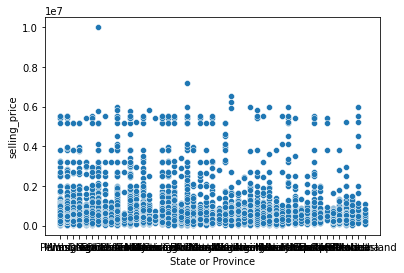

In [174]:
sns.scatterplot(df1['State or Province'],df1['selling_price'])

In [196]:
df1.head(3)

,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,torque_final
0,Maruti Omni 8 Seater BSIV,2012,150000,35000,Central,Illinois,Chicago,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
1,Maruti Omni 8 Seater BSIV,2017,280000,32000,Central,Michigan,Detroit,Petrol,Dealer,Manual,First Owner,14.0 kmpl,796 CC,35 bhp,5,Y,58.83990
2,Honda City 1.5 EXI,2005,100000,120000,East,Pennsylvania,Philadelphia,Petrol,Individual,Manual,Second Owner,13.0 kmpl,1493 CC,100 bhp,5,Y,127.48645


In [203]:
def splitt(cols):
    x = cols
    return x.split(' ')[0]

In [212]:
df1['mileage'] = df1['mileage'].apply(string)

In [213]:
df1['max_power'] = df1['max_power'].apply(string)

In [214]:
df1['engine'] = df1['engine'].apply(string)

In [211]:
def string(cols):
    x = cols
    return float(x)

<AxesSubplot:>

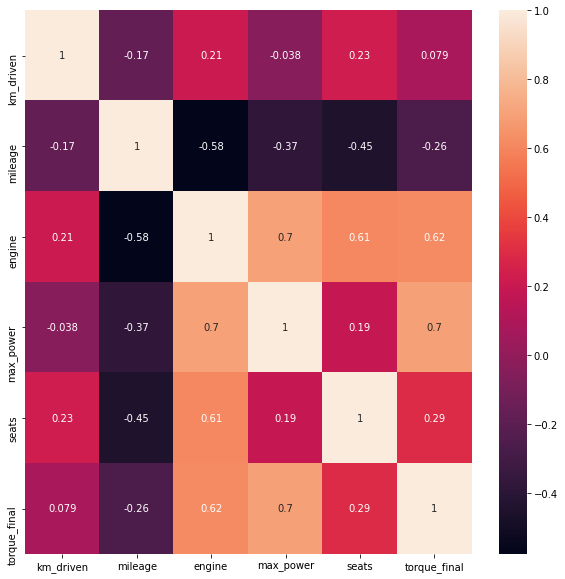

In [233]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot = True)

In [218]:
y = df1['selling_price']

In [225]:
df1.drop('sold',axis = 1,inplace = True)

In [232]:
df1.head()

,year,km_driven,Region,State or Province,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_final
0,2011 to 2015,35000,Central,Illinois,Petrol,Individual,Manual,Second Owner,14.0,796.0,35.0,5,58.83990
1,2016 to 2020,32000,Central,Michigan,Petrol,Dealer,Manual,First Owner,14.0,796.0,35.0,5,58.83990
2,2000 to 2005,120000,East,Pennsylvania,Petrol,Individual,Manual,Second Owner,13.0,1493.0,100.0,5,127.48645
3,2006 to 2010,90000,West,Washington,Petrol,Individual,Manual,Fourth & Above Owner,19.7,796.0,35.0,8,58.83990
4,2000 to 2005,161000,West,Oregon,Petrol,Individual,Manual,Fourth & Above Owner,13.0,1493.0,100.0,5,127.48645


In [238]:
eco = pd.get_dummies(df1,drop_first=True)

In [239]:
eco

,km_driven,mileage,engine,max_power,seats,torque_final,year_2000 to 2005,year_2006 to 2010,year_2011 to 2015,year_2016 to 2020,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,35000,14.00,796.0,35.00,5,58.83990,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
1,32000,14.00,796.0,35.00,5,58.83990,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,120000,13.00,1493.0,100.00,5,127.48645,1,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,90000,19.70,796.0,35.00,8,58.83990,0,1,0,0,...,0,0,1,1,0,1,1,0,0,0
4,161000,13.00,1493.0,100.00,5,127.48645,1,0,0,0,...,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,80000,22.54,1396.0,88.73,5,219.00000,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
7901,110000,18.50,1197.0,82.85,5,113.00000,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
7902,120000,19.30,1248.0,73.90,5,190.00000,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
7903,25000,23.57,1396.0,70.00,5,140.00000,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


In [240]:
import statsmodels.api as sm

In [241]:
x = sm.add_constant(eco)

In [242]:
x

,const,km_driven,mileage,engine,max_power,seats,torque_final,year_2000 to 2005,year_2006 to 2010,year_2011 to 2015,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1.0,35000,14.00,796.0,35.00,5,58.83990,0,0,1,...,0,0,1,1,0,1,0,1,0,0
1,1.0,32000,14.00,796.0,35.00,5,58.83990,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1.0,120000,13.00,1493.0,100.00,5,127.48645,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,1.0,90000,19.70,796.0,35.00,8,58.83990,0,1,0,...,0,0,1,1,0,1,1,0,0,0
4,1.0,161000,13.00,1493.0,100.00,5,127.48645,1,0,0,...,0,0,1,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1.0,80000,22.54,1396.0,88.73,5,219.00000,0,0,1,...,1,0,0,1,0,1,0,1,0,0
7901,1.0,110000,18.50,1197.0,82.85,5,113.00000,0,0,1,...,0,0,1,1,0,1,0,0,0,0
7902,1.0,120000,19.30,1248.0,73.90,5,190.00000,0,1,0,...,1,0,0,1,0,1,0,0,0,0
7903,1.0,25000,23.57,1396.0,70.00,5,140.00000,0,0,1,...,1,0,0,1,0,1,0,0,0,0


In [243]:
y

0       150000
1       280000
2       100000
3       101000
4        81000
         ...  
7900    475000
7901    320000
7902    382000
7903    290000
7904    290000
Name: selling_price, Length: 7905, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split

In [278]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state = 100)

In [279]:
x_train.shape

(6324, 72)

In [280]:
y_train.shape

(6324,)

In [281]:
x_test.shape

(1581, 72)

In [282]:
y_test.shape

(1581,)

In [283]:
model1 = sm.OLS(y_train,x_train).fit()

In [284]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     506.8
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:03:56   Log-Likelihood:                -1886.4
No. Observations:                6324   AIC:                             3911.
Df Residuals:                    6255   BIC:                             4377.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      9.4791      0.095     99.918      0.000       9.293       9.665
km_driven                              -6.583e-07   8.27e-08     -7.960      0.000    -8.2e-07   -4.96e-07
mileage                                    0.0213      0.002     12.516      0.000       0.018       0.025
engine                                     0.0002    1.9e-05     11.930      0.000       0.000       0.000
max_power                                  0.0111      0.000     47.199      0.000       0.011       0.012
seats                                      0.0584      0.006      9.105      0.000       0.046       0.071
torque_final                              -0.0001   6.38e-05     -1.617      0.106      -0.000    2.19e-05
year_2000 to 2005                          0.1008      0.067      1.494      0.135      -0.031       0.233
year_2006 to 2010                          0.5458      0.064      8.574      0.000       0.421       0.671
year_2011 to 2015                          1.0048      0.064     15.763      0.000       0.880       1.130
year_2016 to 2020                          1.4500      0.065     22.475      0.000       1.323       1.576
Region_East                                0.5424      0.016     34.730      0.000       0.512       0.573
Region_South                               0.6126      0.034     17.783      0.000       0.545       0.680
Region_West                                0.5284      0.016     33.254      0.000       0.497       0.560
State or Province_Arizona                  0.0434      0.035      1.255      0.210      -0.024       0.111
State or Province_Arkansas                -0.0140      0.050     -0.282      0.778      -0.111       0.083
State or Province_California               0.0563      0.017      3.247      0.001       0.022       0.090
State or Province_Colorado                 0.0891      0.029      3.067      0.002       0.032       0.146
State or Province_Connecticut              0.0751      0.044      1.699      0.089      -0.012       0.162
State or Province_Delaware                 0.0300      0.089      0.337      0.736      -0.145       0.205
State or Province_District of Columbia     0.1195      0.043      2.747      0.006       0.034       0.205
State or Province_Florida                 -0.0405      0.039     -1.036      0.300      -0.117       0.036
State or Province_Georgia                  0.0249      0.044      0.564      0.573      -0.062       0.112
State or Province_Idaho                    0.0121      0.038      0.319      0.750      -0.062       0.086
State or Province_Illinois                 0.5572      0.019     29.499      0.000       0.520       0.594
State or Province_Indiana                  0.6335      0.026     24.574      0.000     

Text(0.5, 1.0, 'PP plot to check normality of the error')

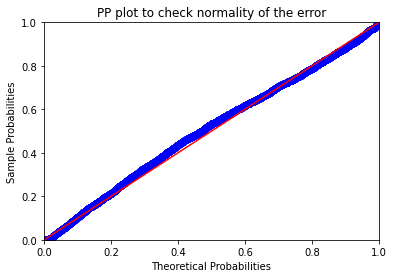

In [301]:
model3_resid = model3.resid

probplot = sm.ProbPlot(model3_resid,fit='True')
probplot.ppplot(line = '45')
plt.title('PP plot to check normality of the error')

In [286]:
def get_standardized_values(vals):
    return(vals - vals.mean())/ vals.std()

Text(0.5, 1.0, 'Residual Plot')

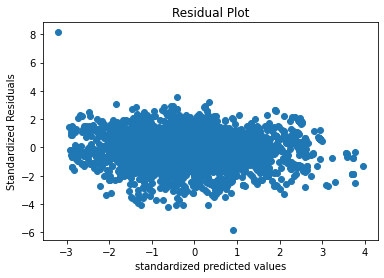

In [302]:
plt.scatter(get_standardized_values(model3.fittedvalues),get_standardized_values(model3_resid))

plt.xlabel("standardized predicted values")
plt.ylabel('Standardized Residuals')
plt.title("Residual Plot")

In [288]:
def get_vif_factors(x):
    x_matrix = x.to_numpy()
    vif = [variance_inflation_factor(x_matrix,i) for i in range(x_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = x.columns
    vif_factors['vif'] = vif
    return vif_factors;

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [289]:
vif_factors = get_vif_factors(x[x_features])

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



In [290]:
def get_significant_vars(lm):
    var_p_vals = pd.DataFrame(lm.pvalues)
    var_p_vals['vars'] = var_p_vals.index
    var_p_vals.columns = ['pvals','vars']
    return list(var_p_vals[var_p_vals.pvals <=0.05]['vars'])

In [292]:
get_significant_vars(model1)

['const',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'year_2006 to 2010',
 'year_2011 to 2015',
 'year_2016 to 2020',
 'Region_East',
 'Region_South',
 'Region_West',
 'State or Province_California',
 'State or Province_Colorado',
 'State or Province_District of Columbia',
 'State or Province_Illinois',
 'State or Province_Indiana',
 'State or Province_Iowa',
 'State or Province_Kansas',
 'State or Province_Michigan',
 'State or Province_Minnesota',
 'State or Province_Missouri',
 'State or Province_Montana',
 'State or Province_Nebraska',
 'State or Province_New Mexico',
 'State or Province_New York',
 'State or Province_North Dakota',
 'State or Province_Ohio',
 'State or Province_Oklahoma',
 'State or Province_South Dakota',
 'State or Province_Texas',
 'State or Province_Wisconsin',
 'fuel_Diesel',
 'fuel_LPG',
 'seller_type_Individual',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

In [1]:
significant_vars = get_significant_vars(model1)

NameError: name 'get_significant_vars' is not defined

In [276]:
y = np.log(y)

In [277]:
y

0       11.918391
1       12.542545
2       11.512925
3       11.522876
4       11.302204
          ...    
7900    13.071070
7901    12.676076
7902    12.853176
7903    12.577636
7904    12.577636
Name: selling_price, Length: 7905, dtype: float64

In [294]:
model2 = sm.OLS(y_train,x_train[significant_vars]).fit()

In [295]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     906.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:05:49   Log-Likelihood:                -1899.3
No. Observations:                6324   AIC:                             3877.
Df Residuals:                    6285   BIC:                             4140.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      9.6242      0.057    168.894      0.000       9.512       9.736
km_driven                              -6.566e-07   8.22e-08     -7.992      0.000   -8.18e-07   -4.96e-07
mileage                                    0.0214      0.002     12.757      0.000       0.018       0.025
engine                                     0.0002   1.87e-05     11.998      0.000       0.000       0.000
max_power                                  0.0110      0.000     53.551      0.000       0.011       0.011
seats                                      0.0585      0.006      9.154      0.000       0.046       0.071
year_2006 to 2010                          0.4608      0.027     17.245      0.000       0.408       0.513
year_2011 to 2015                          0.9204      0.026     34.802      0.000       0.869       0.972
year_2016 to 2020                          1.3650      0.028     48.701      0.000       1.310       1.420
Region_East                                0.5832      0.014     41.413      0.000       0.556       0.611
Region_South                               0.6059      0.013     47.967      0.000       0.581       0.631
Region_West                                0.5626      0.015     36.631      0.000       0.532       0.593
State or Province_California               0.0277      0.018      1.544      0.123      -0.007       0.063
State or Province_Colorado                 0.0609      0.031      1.951      0.051      -0.000       0.122
State or Province_District of Columbia     0.0846      0.046      1.838      0.066      -0.006       0.175
State or Province_Illinois                 0.5624      0.018     30.899      0.000       0.527       0.598
State or Province_Indiana                  0.6400      0.025     25.474      0.000       0.591       0.689
State or Province_Iowa                     0.5829      0.032     17.998      0.000       0.519       0.646
State or Province_Kansas                   0.5622      0.034     16.460      0.000       0.495       0.629
State or Province_Michigan                 0.6170      0.022     28.631      0.000       0.575       0.659
State or Province_Minnesota                0.6161      0.029     21.159      0.000       0.559       0.673
State or Province_Missouri                 0.6233      0.030     21.089      0.000       0.565       0.681
State or Province_Montana                  0.0912      0.060      1.530      0.126      -0.026       0.208
State or Province_Nebraska                 0.6706      0.047     14.144      0.000       0.578       0.764
State or Province_New Mexico               0.0874      0.045      1.926      0.054      -0.002       0.176
State or Province_New York                 0.0278      0.020      1.389      0.165     

In [296]:
get_significant_vars(model2)

['const',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'year_2006 to 2010',
 'year_2011 to 2015',
 'year_2016 to 2020',
 'Region_East',
 'Region_South',
 'Region_West',
 'State or Province_Illinois',
 'State or Province_Indiana',
 'State or Province_Iowa',
 'State or Province_Kansas',
 'State or Province_Michigan',
 'State or Province_Minnesota',
 'State or Province_Missouri',
 'State or Province_Nebraska',
 'State or Province_North Dakota',
 'State or Province_Oklahoma',
 'State or Province_South Dakota',
 'State or Province_Texas',
 'State or Province_Wisconsin',
 'fuel_Diesel',
 'fuel_LPG',
 'seller_type_Individual',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

In [297]:
significant_vars = get_significant_vars(model2)

In [298]:
model3 = sm.OLS(y_train,x_train[significant_vars]).fit()

In [300]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                  Adj. R-squared:         0.845    
Dependent Variable:      selling_price        AIC:                    3876.1034
Date:                    2021-03-17 22:08     BIC:                    4092.1709
No. Observations:        6324                 Log-Likelihood:         -1906.1  
Df Model:                31                   F-statistic:            1110.    
Df Residuals:            6292                 Prob (F-statistic):     0.00     
R-squared:               0.845                Scale:                  0.10753  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
const                           9.6248   0.0570 168.8962 0.0000  9.5131  9.7365
km_driven                      -0.0000   0.0000  -7.9487 0.0000 -0.0000 -0.0000
mileage                         0.0213   0.0017  12.7207 0.0000  0.0180  0.0246
engine                          0.0002   0.0000  11.9876 0.0000  0.0002  0.0003
max_power                       0.0110   0.0002  53.5941 0.0000  0.0106  0.0114
seats                           0.0587   0.0064   9.1909 0.0000  0.0462  0.0712
year_2006 to 2010               0.4617   0.0267  17.2772 0.0000  0.4094  0.5141
year_2011 to 2015               0.9220   0.0265  34.8545 0.0000  0.8701  0.9738
year_2016 to 2020               1.3669   0.0280  48.7718 0.0000  1.3119  1.4218
Region_East                     0.5945   0.0122  48.7779 0.0000  0.5706  0.6184
Region_South                    0.6036   0.0126  47.8526 0.0000  0.5789  0.6284
Region_West                     0.5831   0.0121  48.1169 0.0000  0.5594  0.6069
State or Province_Illinois      0.5602   0.0182  30.7896 0.0000  0.5245  0.5958
State or Province_Indiana       0.6378   0.0251  25.3849 0.0000  0.5886  0.6871
State or Province_Iowa          0.5808   0.0324  17.9277 0.0000  0.5173  0.6443
State or Province_Kansas        0.5601   0.0342  16.3941 0.0000  0.4931  0.6271
State or Province_Michigan      0.6148   0.0215  28.5348 0.0000  0.5726  0.6571
State or Province_Minnesota     0.6139   0.0291  21.0791 0.0000  0.5568  0.6710
State or Province_Missouri      0.6210   0.0296  21.0090 0.0000  0.5631  0.6790
State or Province_Nebraska      0.6683   0.0474  14.0916 0.0000  0.5754  0.7613
State or Province_North Dakota  0.7128   0.0600  11.8785 0.0000  0.5952  0.8305
State or Province_Oklahoma      0.5230   0.0373  14.0344 0.0000  0.4499  0.5960
State or Province_South Dakota  0.6019   0.0754   7.9803 0.0000  0.4540  0.7498
State or Province_Texas         0.5784   0.0178  32.4802 0.0000  0.5435  0.6133
State or Province_Wisconsin     0.5705   0.0338  16.8700 0.0000  0.5042  0.6367
fuel_Diesel                     0.1348   0.0119  11.3079 0.0000  0.1114  0.1581
fuel_LPG                        0.1662   0.0626   2.6556 0.0079  0.0435  0.2888
seller_type_Individual         -0.1055   0.0124  -8.5221 0.0000 -0.1297 -0.0812
transmission_Manual            -0.2217   0.0156 -14.1909 0.0000 -0.2523 -0.1911
owner_Fourth & Above Owner     -0.2330   0.0309  -7.5426 0.0000 -0.2936 -0.1725
owner_Second Owner             -0.1216   0.0107 -11.3951 0.0000 -0.1425 -0.1007
owner_Test Drive Car            0.5633   0.1900   2.9648 0.0030  0.1908  0.9357
owner_Third Owner              -0.1819   0.0181 -10.0405 0.0000 -0.2174 -0.1464
-------------------------------------------------------------------------------
Omnibus:              339.102        Durbin-Watson:           1.997            
Prob(Omnibus):        0.000          Jarque-Bera (JB):        693.342          
Skew:                 -0.375         Prob(JB):                0.000            
Kurtosis:             4.439          Condition No.:    

In [303]:
from sklearn.metrics import r2_score,mean_squared_error

In [305]:
pred_y = model3.predict(x_test[significant_vars])

In [306]:
pred_y

5244    12.431478
7861    12.713662
5968    11.368150
7032    12.902735
4791    12.567123
          ...    
4896    12.175926
949     12.873128
2899    13.529157
5937    12.808454
7357    12.926976
Length: 1581, dtype: float64

In [307]:
np.abs(r2_score(y_test,pred_y))

0.8405194284882405